# Exploration of data prepared with Log2 logarithmic transformation

#### Cynthia Soto
#### Fecha: 24 de Julio 2020

#### Type of data: expression levels (absolute and Log2)
#### Data estimated with: Salmon SA mode 
#### Dataset1: Plantas sanas de Arabidopsis

Outliers can be removed from the data using statistical methods of IQR, Z-Score and Data Smoothing
1. For calculating IQR of a dataset first calculate it’s 1st Quartile(Q1) and 3rd Quartile(Q3) i.e. 25th and 75 percentile of the data and then subtract Q1 from Q3.
2. Z-Score tells how far a point is from the mean of dataset in terms of standard deviation.An absolute value of z score which is above 3 is termed as an outlier.
3. Data smoothing is a process to remove the spikes and peaks from the data. Moving Average, Rolling Mean and Exponential smoothing are some of the process to smooth the data. Pandas Exponential smoothing function (EWM) can be used to calculate the value at different alpha level.

In [1]:
# Libraries required
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib widget
import numpy as np
import seaborn as sns
# importing Statistics module 
import statistics 
from scipy.stats import iqr
from scipy import stats

In [2]:
#print(os.getcwd())
try:
    # Change the current working Directory    
    os.chdir("/home/cyntsc/Proyectos/tesis-code/")
    print("Directory changed")
except OSError:
    print("Can't change the Current Working Directory")    
    
    #print(os.listdir(os.getcwd())

Directory changed


In [3]:
# Import Data 
df = pd.read_csv('SRR3383640_quant.sf', sep='\t')

#Get max value of the numeric cols
df.select_dtypes(include=[np.number]).max()
df.select_dtypes(include=[np.number]).min()
#Get basic statics
df.describe()

FileNotFoundError: [Errno 2] File SRR3383640_quant.sf does not exist: 'SRR3383640_quant.sf'

In [17]:
df

,Name,Length,EffectiveLength,TPM,NumReads
0,SRR3383640.1,93,3.333,0.094239,1.000
1,SRR3383640.2,93,3.333,0.094239,1.000
2,SRR3383640.3,93,3.333,1.156771,12.275
3,SRR3383640.4,75,2.971,0.105709,1.000
4,SRR3383640.5,93,3.333,0.286801,3.043
...,...,...,...,...,...
33559,SRR3383640.35692,93,3.333,0.377026,4.001
33560,SRR3383640.35693,93,3.333,1.076852,11.427
33561,SRR3383640.35694,93,3.333,0.094239,1.000
33562,SRR3383640.35695,93,3.333,0.452396,4.801


How to create lambda functions

df_tmp= df['TPM'].map(lambda x: 1+x)
#df['TPM'].map(lambda x: 1+x).head()

If required, adding a 1 to the TPMs can be done to avoid aritmetical errors. lampba is an operator that helps to create rapid functions. 
You just have to specify the argument (x), and the function to return followed by a : sign. Let's demonstrate it by doing the same operation as the code cell bellow by specifying a function that takes in an array and returns the sum of every element in the array.

#Function:
def sum_1(x):
    return x + 1

#Called the function
df['TPM'].map(sum_1).head()

Also, apply can be used: `apply` applies a function along any axis of the DataFrame.

df[['TPM']].apply(sum, axis = 0)

In [18]:
#(df['TPM'] > 10000).tail()   #Maked a boolean operation
#df[df['TPM'] > 10000]  #Pull the boolean indexes to show the values

# the above statement is passing a Series of True/ False objects to the DataFrame, returning all rows with True

df[df['EffectiveLength'] < 100].head()

,Name,Length,EffectiveLength,TPM,NumReads
0,SRR3383640.1,93,3.333,0.094239,1.000
1,SRR3383640.2,93,3.333,0.094239,1.000
2,SRR3383640.3,93,3.333,1.156771,12.275
3,SRR3383640.4,75,2.971,0.105709,1.000
4,SRR3383640.5,93,3.333,0.286801,3.043


In [19]:
is_len_corta = df['EffectiveLength'] < 100
##This yields exactly the same 
#df[is_len_corta].tail()
##count the number of dinner entries in our data set. we can use the .value_counts() method to do so. 
is_len_corta.value_counts()

True    33564
Name: EffectiveLength, dtype: int64

In [20]:
# Checking counts of values in zero
df.isin([0]).sum()

Name                  0
Length                0
EffectiveLength       0
TPM                1680
NumReads           1680
dtype: int64

We'll now use the amazing [Seaborn](http://seaborn.pydata.org/) module to do some EDA. I strongly encourage you to look at their [gallery](http://seaborn.pydata.org/examples/index.html) to see some awesome examples. This module is great to make some interesting and publishable graphs for your future papers.

We'll explore our data set using different color [palettes](https://seaborn.pydata.org/tutorial/color_palettes.html).

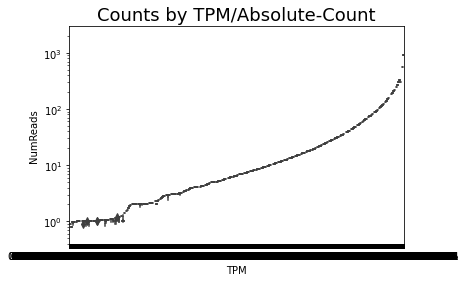

In [21]:
ax = sns.boxplot(x= df['TPM'], y = df['NumReads'], palette = "husl")
ax.set_title('Counts by TPM/Absolute-Count', fontsize= 18)
ax.set_yscale('log')

> #####  In descriptive statistics, a boxplot (also known as a box-and-whisker diagram or plot) is a convenient way of graphically depicting groups of numerical data through their five-number summaries (the smallest observation, lower quartile (Q1), median (Q2), upper quartile (Q3), and largest observation). A boxplot may also indicate which observations, if any, might be considered outliers. The boxplot was invented in 1977 by the American statistician John Tukey.

Violin plots make a kernel density estimation(KDE) of the distribution. If you want a deeper intuition about what a KDE means please refer to the great Jake Van der Plas' Data Science Handbook. KDE plots are a nice way to visualize continuous distributions. The Seaborn library has some nice implementations in both the sns.distplot and sns.kdeplot functions. Here is a nice walkthrough of the different options to visualize distributions in Seaborn. 

To get a better sense of the data when using violin plots, I personally prefer to set the inner parameter to quartile, as it shows the locations of the quartiles (25th, 75th percentile and the median) in the data, and gives a sense of how the data is distributed. Moreover, I like that all of the violins have the same width, so they are readily comparable to each other, thus I set the scale parameter to width

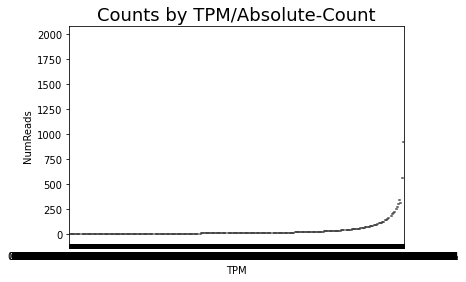

In [22]:
ax = sns.violinplot(x= df['TPM'], y = df['NumReads'], inner = 'quartile', scale= 'width', palette = "husl")
ax.set_title('Counts by TPM/Absolute-Count', fontsize= 18);

Violinplots are nice, but to get a real sense of the raw data, is best to use a stripplot or swarmplot to visualize the individual points in a dataset. As a general rule of thumb, always plot all your data points

Text(0.5, 1.0, 'Counts by TPM/Absolute-Count')

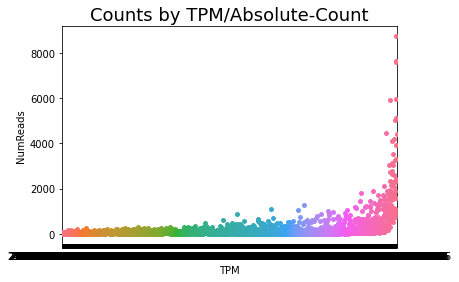

In [31]:
ax = sns.stripplot(x= df['TPM'], y = df['NumReads'], palette = "husl")
ax.set_title('Counts by TPM/Absolute-Count', fontsize= 18)

the best of the best is to use a swarm plot + a boxplot.

Text(0.5, 1.0, 'Counts by TPM/Absolute-Count')

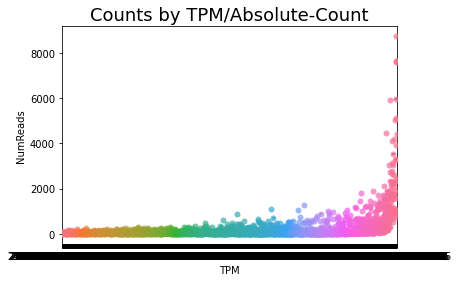

In [33]:
ax = sns.boxplot(x= df['TPM'], y = df['NumReads'],color='lightgrey')
ax = sns.swarmplot(x= df['TPM'], y = df['NumReads'], palette = "husl", alpha = 0.7,
                  size = 6)

ax.set_title('Counts by TPM/Absolute-Count', fontsize= 18)

But the actual best way to visualize distributions are empirical cumulative distribution functions or ECDFs. This is the most unbiased way to plot all the data points, as swarmplots come to a halt when the dataset is very large. An ECDF corresponds to the fraction of points that are equal to or smaller than a given value in the distribution (or point in the x-axis in the plot). 

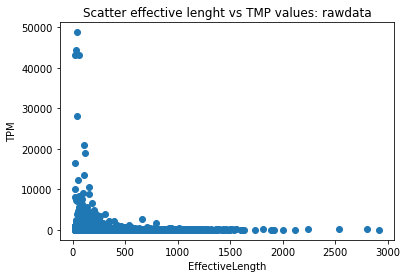

In [22]:
# Exploring: scatter lenght versus normalized counts
plt.scatter('EffectiveLength','TPM', data=df)
plt.xlabel('EffectiveLength')
plt.ylabel('TPM')
plt.title('Scatter effective lenght vs TMP values: rawdata')
plt.show()

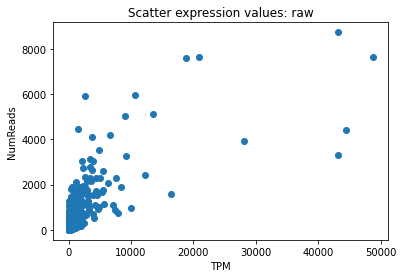

In [23]:
# Exploring data: scatter absolute versus normalized counts

plt.scatter('TPM','NumReads', data=df)
plt.xlabel('TPM')
plt.ylabel('NumReads')
plt.title('Scatter expression values: raw')
plt.show()

In [ ]:
lst_TPM = df1 = df['TPM']
print("Standard Deviation of sample is % s " 
      % (statistics.stdev(lst_TPM))) 

In [ ]:
# Distribution plot of normalized value 
sns.distplot(lst_TPM);


In [ ]:
df = pd.DataFrame(np.random.randn(20,2),
                  columns=['NumReads', 'TPM'])
boxplot = df.boxplot(column=['NumReads', 'TPM'])

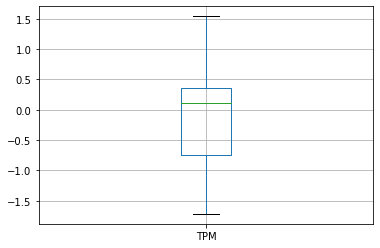

In [10]:
df = pd.DataFrame(np.random.randn(20,1),
                  columns=['TPM'])
boxplot = df.boxplot(column=['TPM'])

### Visualizing distributions

In [38]:
#Esta linea coloca el fondo en cuadricula. 
sns.set_style('darkgrid')

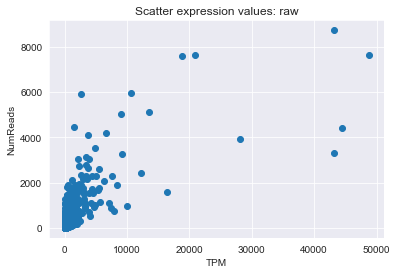

In [39]:
# #gaussian distro
plt.scatter('TPM','NumReads', data=df)
plt.xlabel('TPM')
plt.ylabel('NumReads')
plt.title('Scatter expression values: raw')
plt.show()

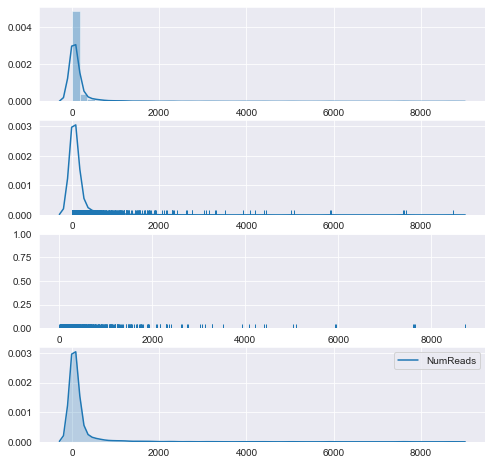

In [44]:
fig, axes = plt.subplots(4, 1, figsize = (8,8))
x= df['NumReads']
sns.distplot(x, ax = axes[0]);
sns.distplot(x, rug = True, hist = False, ax = axes[1])
sns.rugplot(x, ax = axes[2]);#Plot datapoints in an array as sticks on an axis.
sns.kdeplot(x, shade = True, ax= axes[3]);

In [50]:
y= df['TPM']

In [51]:
data = np.vstack((x, y))
#data

In [53]:
data = data.T
#data

In [54]:
data

array([[ 28.      ,  78.489229],
       [ 20.      ,  74.179055],
       [ 38.      ,  56.59079 ],
       ...,
       [ 45.      ,  51.674533],
       [132.      , 642.807957],
       [214.      , 213.203961]])

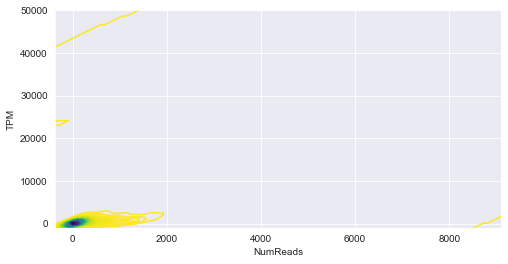

In [73]:
plt.figure(figsize = (8,4))

sns.kdeplot(x,y, n_levels=1000, cmap = 'viridis_r', shade = False) 

plt.ylim(-1000, 50000);

(-1.0, 4000.0)

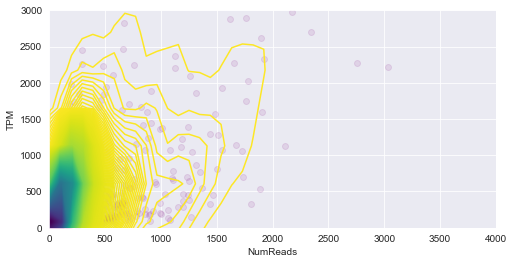

In [77]:
plt.figure(figsize = (8,4))

sns.kdeplot(x, y, n_levels= 1000, cmap = 'viridis_r', shade = False)

plt.scatter(x, y, alpha = 0.1, c = 'purple')
plt.ylim(-1, 3000);
plt.xlim(-1, 4000)

In [ ]:
hv.Scatter(df_yuc , kdims = ['índice de marginación'], vdims = ['% analfabeta'] )